In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tick

In [2]:
def brownian(x0, n, out=None):
    # generate samples using normal distribution
    mu, sigma = 0, 1
    r = np.random.normal(loc=mu, scale=sigma, size=x0.shape + (n,))

    if out is None:
        out = np.empty(r.shape)

    # compute brownian motion by forming cumulative sum
    # axis=-1 means last dimension, out=output array
    np.cumsum(r, axis=-1, out=out)
    out += np.expand_dims(x0, axis=-1)

    return out

In [3]:
if __name__ == "__main__":
    """
    T: total time (x axis)
    N: number of steps (data)
    m: number of graph
    """
    T, N, m = 30, 600, 1
    
    # Time step size
    dt = T/N
    t = np.linspace(0.0, N*dt, N+1)
    
    # initialization
    x = np.empty((m, N+1))
    x[:, 0] = 0    
    
    # Calc
    brownian(x[:,0], N, out=x[:,1:])

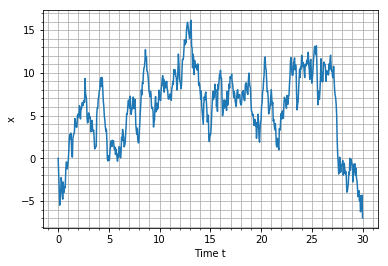

In [4]:
    # Plot
    #sns.set_style('whitegrid')
    fig = plt.figure()
    axis = fig.add_subplot(111)
    axis.axis('auto')
    
    for k in range(m):
        sns.lineplot(x=t, y=x[k])
    plt.xlabel("Time t")
    plt.ylabel("x")
    
    plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(1))
    plt.grid(which='minor')
    plt.savefig("1.png",format = 'png', dpi=300)
    plt.show()

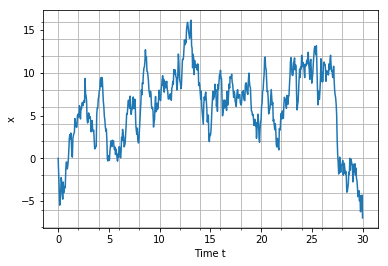

In [5]:
    # Plot
    #sns.set_style('whitegrid')
    fig = plt.figure()
    axis = fig.add_subplot(111)
    axis.axis('auto')
    
    for k in range(m):
        sns.lineplot(x=t, y=x[k])
    plt.xlabel("Time t")
    plt.ylabel("x")
    
    plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(2))
    plt.gca().yaxis.set_minor_locator(tick.MultipleLocator(2))
    plt.grid(which='minor')
    plt.savefig("2.png",format = 'png', dpi=300)
    plt.show()